## Etude sur Introduction aux réseaux de neurones artificiels  - classification

La classification par un perceptron multi-couche sera illustrée dans trois Jupyter Notebooks sur l'exemple du Breast cancer wisconsin (diagnostic) dataset en utilisant exclusivement TensorFlow / Keras (pas de scikit-learn).

### test

### 1 - Importation des librairies Python nécessaires à la résolution du problème

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import tensorflow as tf
from keras.datasets import boston_housing
import joblib
from keras import layers
from keras import models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow

### 2 - affichage

In [2]:
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("max_row", 500)

### 3 - Chargement des données test et le modèle

In [3]:
X_test = joblib.load("X_test.joblib")
y_test = joblib.load("y_test.joblib")

In [4]:
X_test.shape, y_test.shape

((114, 30), (114,))

In [5]:
model = load_model('model_best')

### 4 - matrix de confusion

https://qiita.com/penpenta/items/dc7ef234ccce325c53ab

In [16]:
y_test_pred = model.predict(X_test)
y_test_pred  = y_test_pred > 0.5

cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[41,  1],
       [ 4, 68]], dtype=int64)

In [17]:
# `np.argmax`で配列の中から最大の値（画像の分類されたラベルの番号）を取得  
print(f'predicted label : {np.argmax(y_test_pred[0])}')
# 正解データを確認
print(f'true label : {y_test[0]}')

predicted label : 0
true label : 0


### 5 - loss and accuracy for test

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

4/4 - 0s - loss: 0.1820 - accuracy: 0.9561 - 48ms/epoch - 12ms/step

Test accuracy: 0.9561403393745422


In [34]:
accuracy_score_keras = tensorflow.keras.metrics.BinaryAccuracy()
accuracy_score_keras.update_state(y_test, y_test_pred)
print(accuracy_score_keras.result().numpy())

0.95614034


### 6 - Observation (score = accuracy):

      train score : 0.9934066
      validation score : 0.986184
      test score : 0.95614034

hyperparamètre de modèle:
    
    learning_rate : 0.1
    neurons : 13 (pour 1 couches cachés)
    activation: relu (pour 1 couches cachés)
    activation: sigmoid (pour la sortie)
     

学習したニューラルネットのパラメーター(重み) Paramètres (poids) du réseau neuronal

In [35]:
w = model.get_weights()
print(w)

[array([[-2.15888321e-01,  5.89685608e-03,  8.59913647e-01,
        -4.23357934e-01, -1.05702734e+00,  9.95745480e-01,
        -2.62667209e-01, -5.03516734e-01, -3.22969705e-01,
         1.59959689e-01, -3.76600444e-01,  4.71799701e-01,
         5.41229963e-01],
       [-1.06723070e+00,  3.19786817e-01,  1.13276911e+00,
        -1.50551319e+00, -7.24671245e-01,  1.04460764e+00,
        -1.76467526e+00, -6.06436253e-01, -1.63045526e+00,
         2.10686728e-01, -4.96541947e-01,  7.89808810e-01,
         8.02285671e-01],
       [-5.95627367e-01, -8.35172236e-02,  3.66890848e-01,
        -5.56458712e-01, -5.48619151e-01,  9.73216236e-01,
        -1.89102650e-01, -6.35048211e-01, -6.15677595e-01,
         5.47166526e-01, -4.09266859e-01,  7.15161920e-01,
         7.96936154e-01],
       [-8.32877755e-01, -4.57749516e-01,  8.64601076e-01,
        -6.83375239e-01, -7.35552192e-01,  8.45984936e-01,
        -3.85933846e-01, -5.21843374e-01, -7.48707771e-01,
         2.75999635e-01, -6.10225741

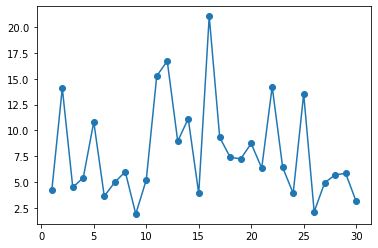

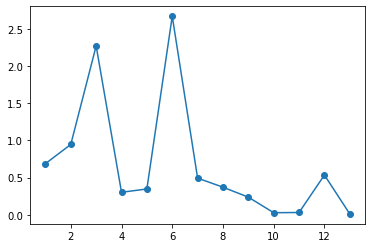

In [36]:
for i in range(len(model.layers)):
    # ニューラルネットの各層について、重みの絶対値の総和をプロット
    w1 = model.layers[i].get_weights()[0]
    plt.figure()
    plt.plot(range(1, len(w1)+1), (w1**2).sum(axis=1), 'o-')
    plt.show()

16 = compactness has the most weight

https://liaoyuan.hatenablog.jp/entry/2018/02/05/214222